In [1]:
import os
import librosa
from librosa.feature import zero_crossing_rate, rms, melspectrogram
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd  # To play sound in the notebook

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.Download the Dataset and Understand the Format

## a.We  will  use CREMAdataset  that  is  available  at  the  following  link:
## https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en

In [2]:
CREMA  = '/kaggle/input/speech-emotion-recognition-en/Crema/'
audios = os.listdir(CREMA)
audios.sort()
print(audios[0:10])
print("\n Audios Size: ",len(audios))

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']

 Audios Size:  7442


## b.Write your own function that loadsan audioand listen to each of the classes you have and plot the waveform of the audio.

Emotion:  1001_DFA_ANG_XX.wav


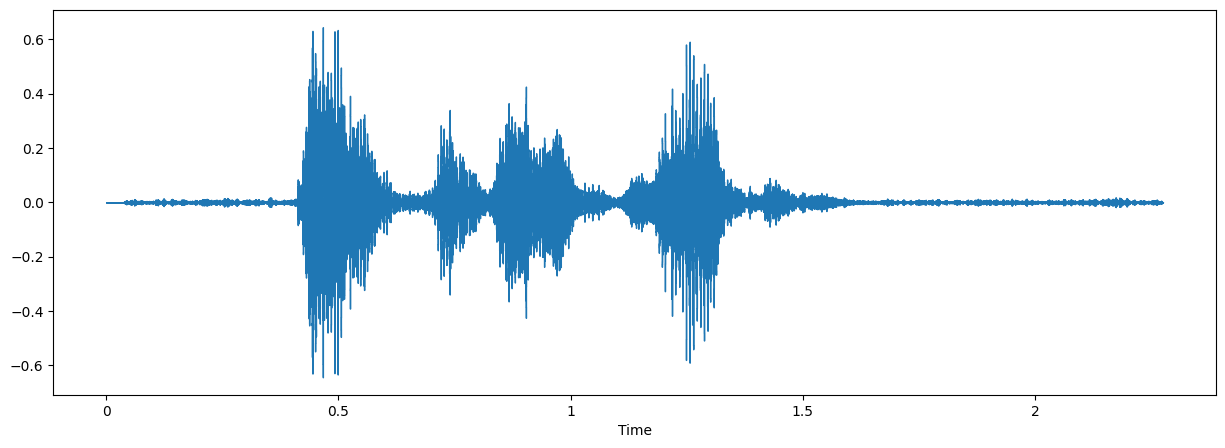

Emotion:  1001_DFA_DIS_XX.wav


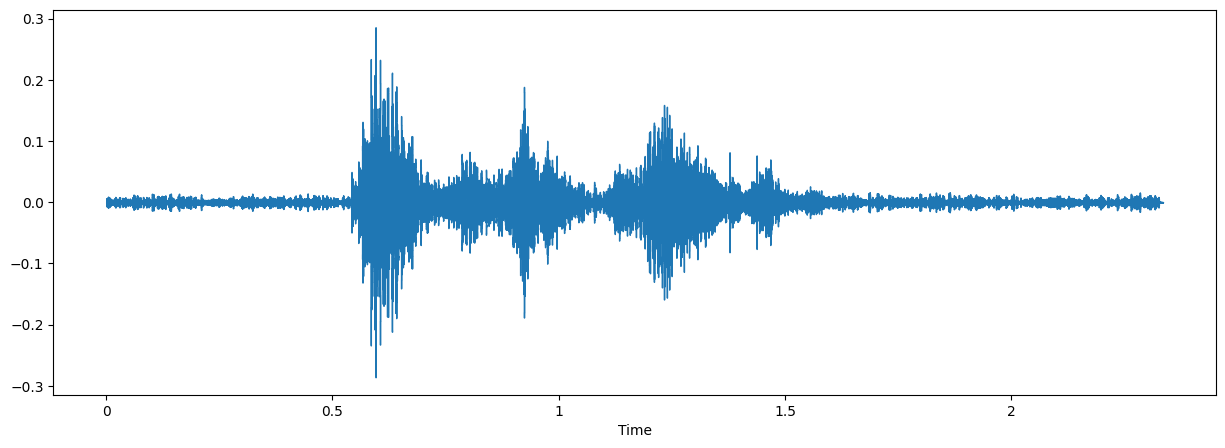

Emotion:  1001_DFA_FEA_XX.wav


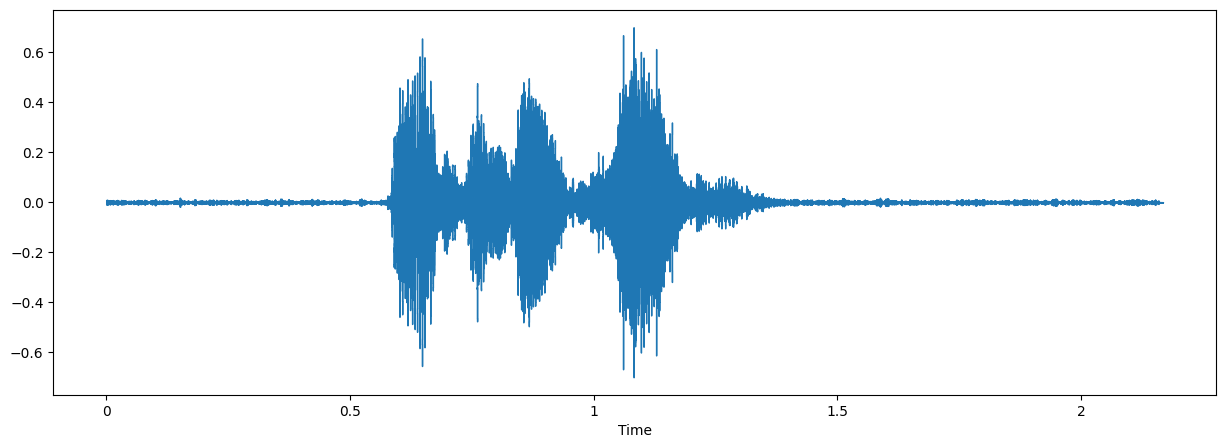

Emotion:  1001_DFA_HAP_XX.wav


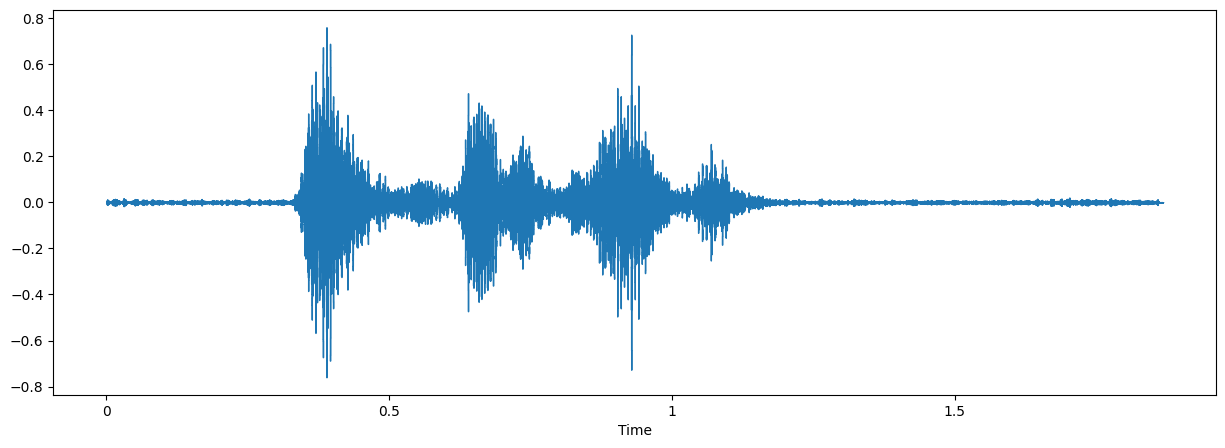

Emotion:  1001_DFA_NEU_XX.wav


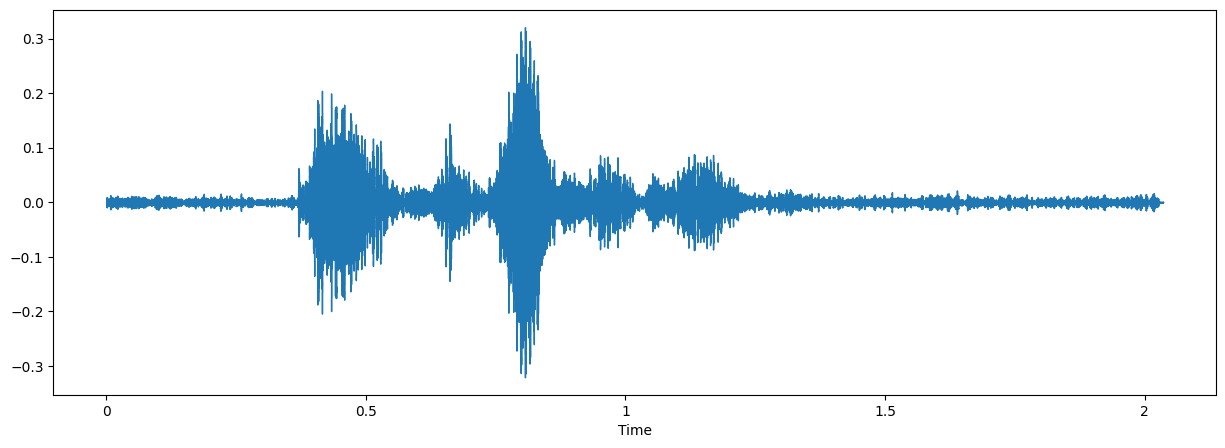

Emotion:  1001_DFA_SAD_XX.wav


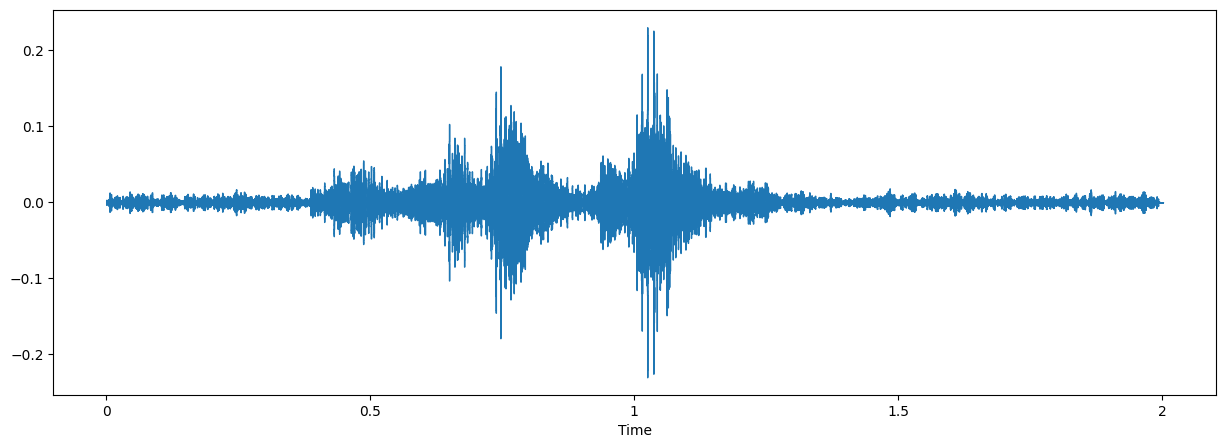

Emotion:  1001_IEO_ANG_HI.wav


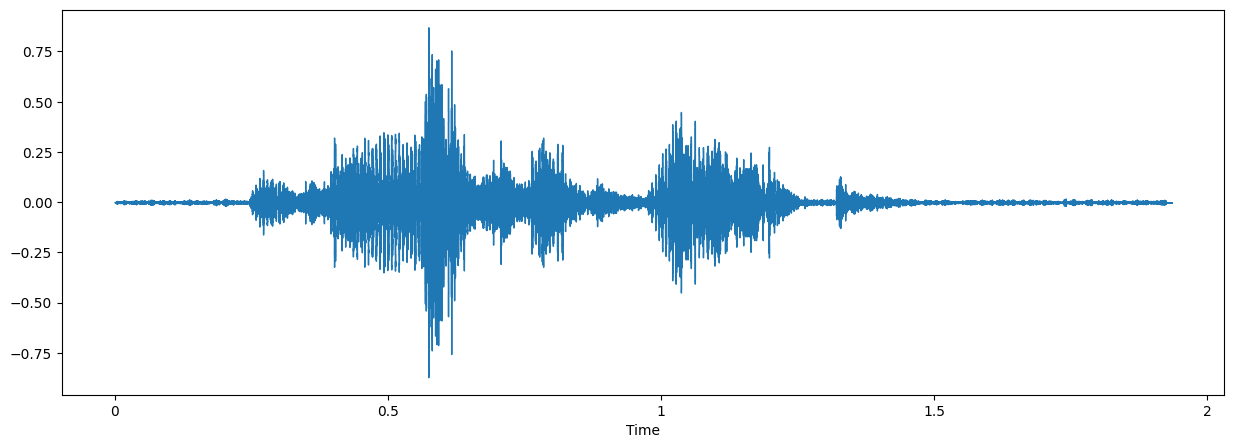

Emotion:  1001_IEO_ANG_LO.wav


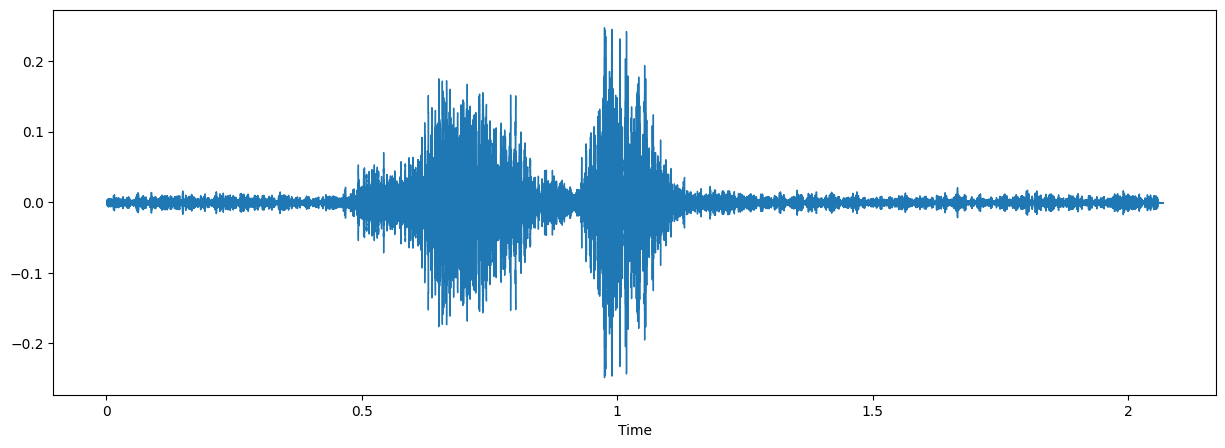

Emotion:  1001_IEO_ANG_MD.wav


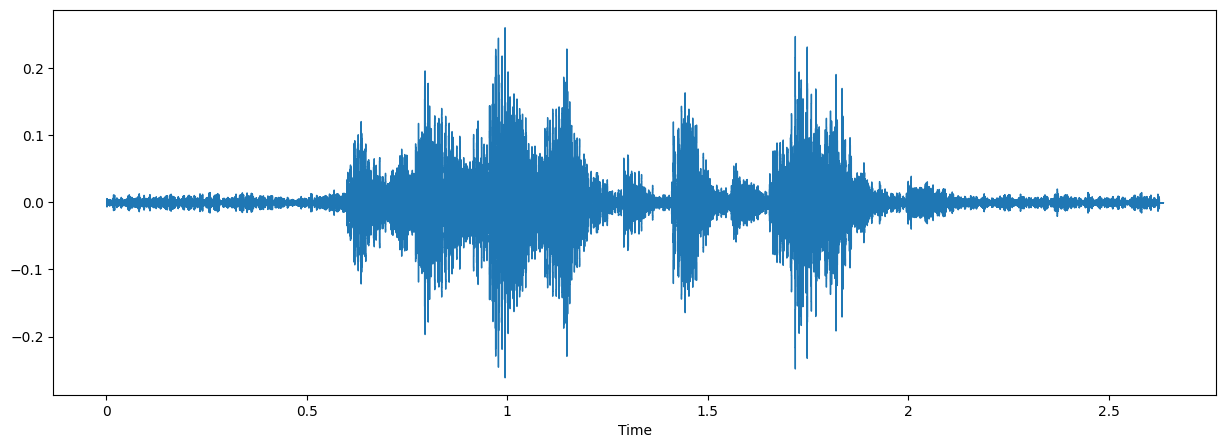

Emotion:  1001_IEO_DIS_HI.wav


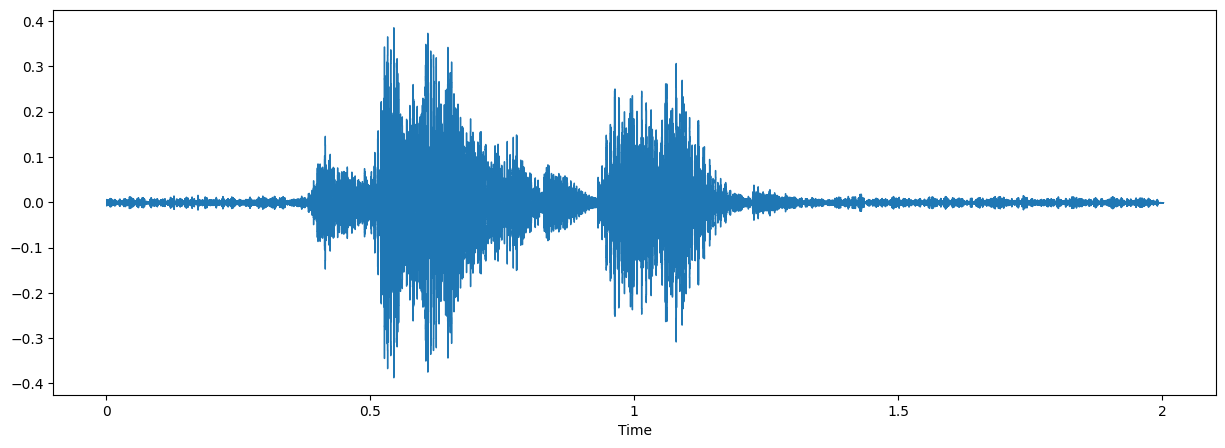

In [3]:
for i in range(10):
    print("Emotion: ", audios[i])
    data, sampling_rate = librosa.load(CREMA + audios[i])
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(data, sr=sampling_rate) #plot the waveform of the audio
    plt.show()
    # Lets play the audio 
    audio = ipd.Audio(CREMA + audios[i]) #listen to each of the classes
    ipd.display(audio)

## 2. Create the Feature Space

Feature spaces are essentially collections of features that are used to represent the data in a more manageable and useful way. In this case, the audio data needs to be transformed into feature spaces that can be used as **input** to a machine learning model.

One way to create a feature space is to work in **the time domain**, which means analyzing the audio data directly in the time domain. This can involve computing various statistical properties of the signal, such as its mean, variance, and standard deviation, or extracting features such as the zero crossing rate and energy.

- **ZCR (Zero Crossing Rate)** is a measure of the rate of sign-changes in the signal within each short-time frame. It is computed by counting the number of times the signal changes sign (i.e., crosses the horizontal axis) within each frame, and dividing by the total number of samples in the frame. ZCR provides information about the temporal structure and periodicity of the signal, and can be used to distinguish between different types of sounds or speech segments with different spectral content.

- **RMS (Root Mean Square)** is a measure of the average power of the signal within each short-time frame. It is computed by squaring the signal values within each frame, averaging the squared values, and taking the square root of the result. RMS provides information about the overall energy level of the signal within each frame, and can be used to distinguish between quiet and loud speech or sounds.

In [4]:
# MAX_LEN = Duration * Sampling_Rate
MAX_LEN = 57344 # 2^15 + 2^14 + 2^12 * 2 
FRAME_SIZE = 1024
HOP_LENGTH = 512
SAMPLING_RATE = 22050

In [5]:
file_paths = []
for file in audios:
    # Storing File Paths
    file_paths.append(CREMA + file)

# print(f"Some File Paths:\n{file_paths[:5]}")
file_paths[:5]

['/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_ANG_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_DIS_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_FEA_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_HAP_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_NEU_XX.wav']

In [6]:
 def padding_truncation(file_paths):
    signals = []
    for audio in file_paths:
        sig , sr = librosa.load(audio) # Audio Signal, Sampling Rate (22050)
        if len(sig) > MAX_LEN :
            sig = sig[:MAX_LEN]
        else:
            # Signal is padded with zeros on both sides to reach MAX_LEN.
            pad = (MAX_LEN - len(sig))//2
            sig = np.pad(sig, (pad, MAX_LEN - len(sig) - pad), 'constant')
        signals.append(sig)
    return signals

In [7]:
signals = padding_truncation(file_paths)
len(signals)

7442

In [8]:
def get_zcr_rms_data(signals):
    data = []
    for sig in signals:
        zcr_data = zero_crossing_rate(y=sig, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
        rms_data = rms(y=sig, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
        arr = np.hstack((rms_data,zcr_data)) # one dimensional [rms, zcr]
        arr = arr.reshape((arr.shape[0], 1))
        data.append(arr)
    return data

In [9]:
zcr_rms_data = get_zcr_rms_data(signals)

### Mel Spectrogram

In [10]:
def get_melspectrogram_data(signals):
    data = []
    for sig in signals:
        mel_spec = melspectrogram(y=sig, sr=22050, n_mels=80, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
        mel_spec = mel_spec.reshape((mel_spec.shape[0], mel_spec.shape[1], 1))
        data.append(mel_spec)
    return data

In [11]:
melspectrogram_data = get_melspectrogram_data(signals) # Will be used from now on ...